## EDA

In [17]:
from __future__ import division
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn import cross_validation
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

import re
from HTMLParser import HTMLParser
import datetime
import cPickle as pickle

In [50]:
# Files that contain extracted names and summaries
sample10_file = '/Users/lekha/galvanize/capstone/projectRiley/data/sample10/sample_output.txt'
sample1000_file = '/Users/lekha/galvanize/capstone/projectRiley/data/sample1000/sample_output.txt'
all_file = '/Users/lekha/galvanize/capstone/projectRiley/data/all_output.txt'

In [5]:
pwd

u'/Users/lekha/galvanize/capstone/projectRiley/code'

In [143]:
cols = defaultdict(list)
num_rows = 0
with open(sample1000_file) as f:
    for line in f:
        num_rows += 1
        n = line.split('||')
        print n[0]
        cols['full_name'].append(n[0])
        cols['summary'].append(n[1])
        cols['html'].append(n[2])

df = pd.DataFrame(data=cols, index = np.arange(num_rows))

# Add new column for first_name
df['first_name'] = df['full_name'].apply(lambda x: x.split()[0].lower())


Ben Berkman
John Cook PhD
Aakash Maniyar
Aaron Buckner
Aaron Hawley
Aaron Schlegel
Abhishek Gupta
Adam Markus
Aditya Gandhi
Aditya Hrishikesh
Adrian Matias
Adrianne M. Grondahl
Jeffrey Portko
Amir Hossein Maleki
Austin (Krause) Ruthruff
Alan Boss
Alex Gross
Alex Gallo
Alexandra Sanchez
Alex Bash
Alex Bu
Alexis Johnston
Alex Webster
Alex Withrow
Alan Horowitz
Alice Hahn
Alice Yao
Alicia Moreno Gonzalez
Aliette Frank
Alina Huldtgren
Alison Driver
Alison Wilbur
Allan Luik
Allison Kelsey
Allison M. FitzGerald
Alyson Jones
Alyssa Thurston
Amanda E. B. Bryan, Ph.D.
Amanda Widjaja
Ambrogino Giusti
Amelia Mattocks
Amira Djebbari
Amy Flores
Amy Lovelace
Amy Kelley
Amy Summe
Ande Flower
Andrea B. Freed, Ph.D.
Andrea Caputo
Andr\xc3\xa9 Dan
Andre Mueller
Andy Bury
Andy Ernst
Andy O'Connell
Angela Ohnmar Duong
Angela Marks
Angie Leonard
Anita Griner, MBA, PMP
Anna Fero
Anne-marie Marshall-Dody, PWM, CFM
\xe2\x98\x81 An Nguyen
M. McCarthy
Anthony Billones
Anton Coleman
Anthony Smith, M.A.
Antti Tel

In [141]:
df.head(100)

,full_name,html,summary,first_name,gender
0,Ben Berkman,./1pridedesign.html\n,LANDSCAPE DESIGN PROFESSIONAL WITH 13 YEARS OF...,ben,male
1,John Cook PhD,./5deep.html\n,Working with People and Organisations to under...,john,male
2,Aakash Maniyar,./aakashmaniyar.html\n,Hard worker driven to succeed. Fast learner al...,aakash,male
3,Aaron Buckner,./aaronbucknermusic.html\n,Missing,aaron,male
4,Aaron Hawley,./aaronhawley.html\n,Missing,aaron,male
5,Aaron Schlegel,./aaronschlegel.html\n,I love solving problems and learning as much a...,aaron,male
6,Abhishek Gupta,./abbygupta.html\n,Missing,abhishek,male
7,Adam Markus,./adammarkus.html\n,"AN ADMISSIONS CONSULTING EXPERT\n', 'Since 200...",adam,male
8,Aditya Gandhi,./adityagandhi1.html\n,Missing,aditya,female
9,Aditya Hrishikesh,./adityah.html\n,An Engineer with MBA who loves to build things...,aditya,female


## Gender Prediction using First Names

In [75]:
def gender_features(word):
    '''
    Returns the following features given a word:
    - name
    - last letter
    - last 2 letters
    - boolean if last letter is vowel
    '''
    return {'name': word, 'last_letter': word[-1], 'last_2_letters': word[-2:], 'last_is_vowel': (word[-1] in 'aeiou')}

In [118]:
import nltk
from nltk.corpus import names

def gender_classifier(first_name):
    # 7944 labeled names from nltk corpus
    labeled_names = ([(name, 'male') for name in names.words('male.txt')] +[(name, 'female') for name in names.words('female.txt')])

    # nltk's NaiveBayesClassifier takes featuresets to train that is a tuple of (features_dict, label)
    featuresets_train = [(gender_features(name), gender) for (name, gender) in labeled_names]
    classifier = nltk.NaiveBayesClassifier.train(featuresets_train)
    
    # get the features of the set to be classified
    name_features = gender_features(first_name)
    g = classifier.classify(name_features)
    return g

df['gender'] = df['first_name'].apply(lambda x: gender_classifier(x))

In [ ]:
# Write DF with gender to a text file


In [119]:
gender_classifier('ben')

{'last_is_vowel': False, 'last_letter': 'n', 'name': 'ben', 'last_2_letters': 'en'}


'male'

In [145]:
# Verification Cell for Classification Algorithm
#train_set, test_set = featuresets[600:], featuresets[:500]
print classifier.classify(gender_features('rahul'))
print classifier.classify(gender_features('Trinity'))
print(nltk.classify.accuracy(classifier, test_set))
classifier.show_most_informative_features(5)

male
male
0.802
Most Informative Features
          last_2_letters = u'na'          female : male   =    106.4 : 1.0
          last_2_letters = u'la'          female : male   =     80.2 : 1.0
          last_2_letters = u'ia'          female : male   =     42.4 : 1.0
          last_2_letters = u'sa'          female : male   =     37.8 : 1.0
             last_letter = u'a'           female : male   =     35.4 : 1.0


In [121]:
df.gender.value_counts()

male      705
female    299
Name: gender, dtype: int64

In [124]:
df.head(20)

,full_name,html,summary,first_name,gender
0,Ben Berkman,./1pridedesign.html\n,LANDSCAPE DESIGN PROFESSIONAL WITH 13 YEARS OF...,ben,male
1,John Cook PhD,./5deep.html\n,Working with People and Organisations to under...,john,male
2,Aakash Maniyar,./aakashmaniyar.html\n,Hard worker driven to succeed. Fast learner al...,aakash,male
3,Aaron Buckner,./aaronbucknermusic.html\n,Missing,aaron,male
4,Aaron Hawley,./aaronhawley.html\n,Missing,aaron,male
5,Aaron Schlegel,./aaronschlegel.html\n,I love solving problems and learning as much a...,aaron,male
6,Abhishek Gupta,./abbygupta.html\n,Missing,abhishek,male
7,Adam Markus,./adammarkus.html\n,"AN ADMISSIONS CONSULTING EXPERT\n', 'Since 200...",adam,male
8,Aditya Gandhi,./adityagandhi1.html\n,Missing,aditya,female
9,Aditya Hrishikesh,./adityah.html\n,An Engineer with MBA who loves to build things...,aditya,female


In [ ]:
# stripping punctuation and funky characters from summary

import string
s = df['summary'][1]
out = s.translate(string.maketrans("",""), string.punctuation)

In [146]:
print df['full_name'][1]
print df['html'][1]
st= df['summary'][1]

John Cook PhD
./5deep.html



In [147]:
st

'Working with People and Organisations to understand the \xe2\x80\x98hidden\xe2\x80\x99 by helping you \xe2\x80\x9csurf the wave of change\xe2\x80\x9d.\\n\', \'\\n\', \'I work with Individuals and Organisations to understand the \xe2\x80\x98hidden\xe2\x80\x99 by helping them\xe2\x80\x9csurf the wave of change.\\n\', \'\\n\', \'Now working on Culture and how to work in the "white space" in between and help organisation to work towards the "Integral Pulse" to become sustainable.\\n\', \'\\n\', \'"Helping organisation\'s to take advantage of whom they are in their prevailing life conditions. To discover the development path that is right for them \xe2\x80\x93 to discover weaknesses and play to strengths. Understand the environment in which they work". John Cook 2003\\n\', \'\\n\', \'Understanding Social & Cultural Dynamics\\n\', \'\\n\', \'Specialities: Culture and Change - all organisations\\n\', \'Senior Management mentor and coach\\n\', \'Business researcher\\n\', \'Training\\n\', \'In

In [148]:
import string
st.translate(string.maketrans("",""),string.punctuation)

'Working with People and Organisations to understand the \xe2\x80\x98hidden\xe2\x80\x99 by helping you \xe2\x80\x9csurf the wave of change\xe2\x80\x9dn n I work with Individuals and Organisations to understand the \xe2\x80\x98hidden\xe2\x80\x99 by helping them\xe2\x80\x9csurf the wave of changen n Now working on Culture and how to work in the white space in between and help organisation to work towards the Integral Pulse to become sustainablen n Helping organisations to take advantage of whom they are in their prevailing life conditions To discover the development path that is right for them \xe2\x80\x93 to discover weaknesses and play to strengths Understand the environment in which they work John Cook 2003n n Understanding Social  Cultural Dynamicsn n Specialities Culture and Change  all organisationsn Senior Management mentor and coachn Business researchern Trainingn Interim Managementn Contract Managementn Consulting Coaching and Personal Development'

In [58]:
x = zip(fnames, gender_fnames1)
with open('gender1000.txt', 'w') as f:
    for line in x:
        name = line[0]
        g = line[1]
        nameg = name + "," + g + "\n"
        f.write(nameg)
        #f.write("\n")

In [160]:
letter_freq = df.last_letter.value_counts()
letter_freq.sort_values(ascending=False, inplace=True)


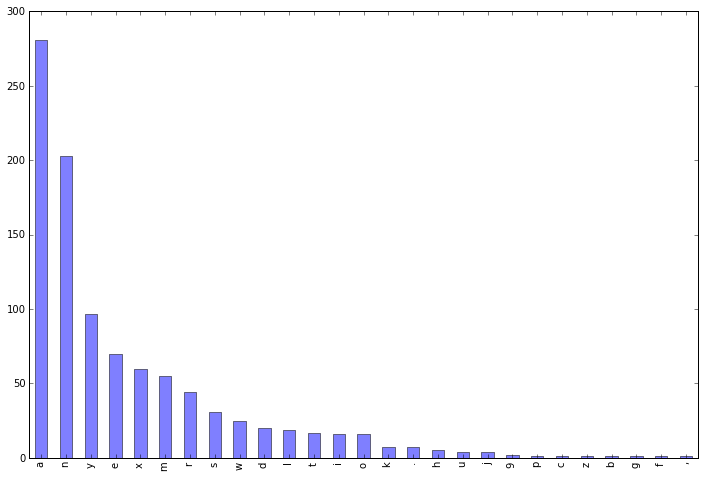

In [161]:
# Plot one of the features for gender prediction: last letter
fig, ax = plt.subplots()
letter_freq.plot(ax=ax, kind='bar', alpha = 0.5, figsize=(12,8))